# Practice Notebook for Data Visualization with Python Course work

## Univariate Exploration of Data

### Bar Charts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pokemon = pd.read_csv("pokemon.csv")

In [4]:
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


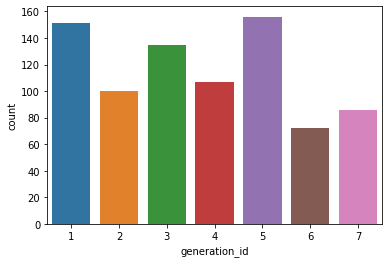

In [5]:
sns.countplot(data=pokemon, x='generation_id');

In [6]:
# obtaining color palette()
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [8]:
# getting the first color as our base color
base_color = sns.color_palette()[0]

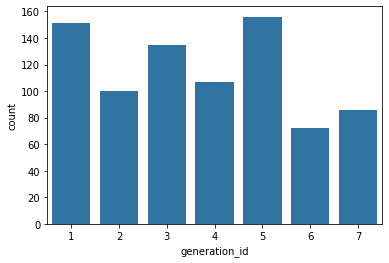

In [9]:
sns.countplot(data=pokemon, x='generation_id', color=base_color);

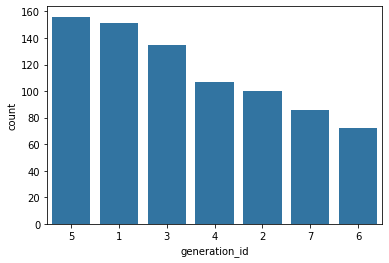

In [11]:
# sorting by number of pokemons introduced in each generation.
order_gen = pokemon.generation_id.value_counts().index
sns.countplot(data=pokemon, x='generation_id',
              color=base_color, order=order_gen);

* type_1 = offensive capabilites
* type_2 = defensive capabilities

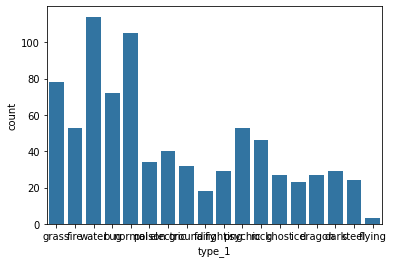

In [13]:
# let's look at the distribution of the offensive capabilities
sns.countplot(data=pokemon, x="type_1",
              color=base_color);

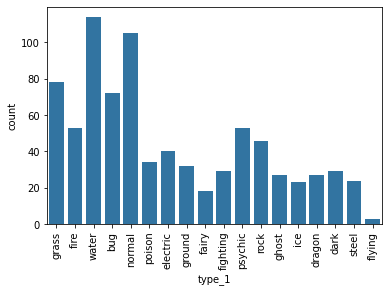

In [14]:
# rotating x ticks
sns.countplot(data=pokemon, x="type_1",
              color=base_color)
plt.xticks(rotation=90);

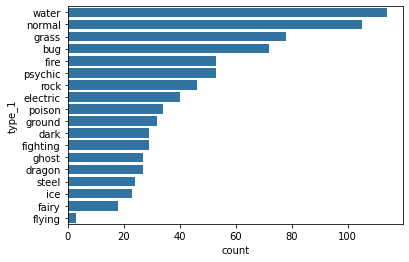

In [17]:
# creating a horizontal barchart instead
order_type1 = pokemon.type_1.value_counts().index
sns.countplot(data=pokemon, y="type_1",
              color=base_color, order=order_type1);

In [18]:
order_type1

Index(['water', 'normal', 'grass', 'bug', 'fire', 'psychic', 'rock',
       'electric', 'poison', 'ground', 'dark', 'fighting', 'ghost', 'dragon',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

#### Absolute vs. Relative Frequency

In [19]:
# let's reshape the pokemon dataframe
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                          value_vars=['type_1','type_2'],
                          var_name='type_level',
                          value_name='type')

pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [23]:
# count the frequency of unique values in the 'type' column of pkmn_types
# dataframe.
type_counts = pkmn_types.type.value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

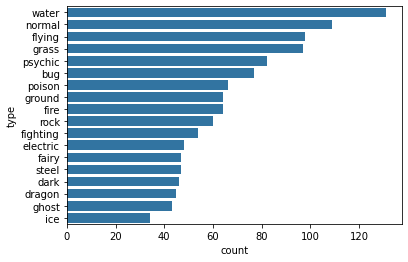

In [25]:
# plot the horizontal bar charts
sns.countplot(data=pkmn_types, y='type',
              order=type_counts.index, color=base_color);

Plot a bar chart having the proportions instead of the actual count on one of the axes.

In [36]:
# Returns the sum of all non-null values in `type` column
n_pokemon = pkmn_types.type.value_counts().sum()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]

# Compute the length of the longest bar in terms of the proportion
# This will be used as reference when creating uniform xticks
max_prop = max_type_count / n_pokemon
print('max_prop: ', max_prop)

# create a set of evenly spaced proportioned values between 0 and max_prop
# with a step size of 0.02
tick_props = np.arange(0, max_prop, 0.02)
print('tick_props: {}'.format(tick_props))

max_prop:  0.10808580858085809
tick_props: [0.   0.02 0.04 0.06 0.08 0.1 ]


In [39]:
# Use a list comprehension to create tick_names that we will apply to the
# tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a 
# formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` 
# is used to represent floating point number.

tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

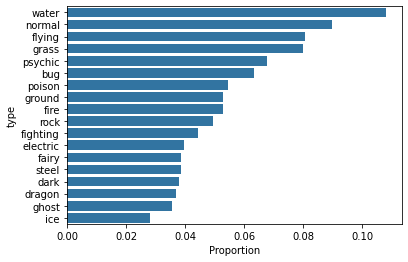

In [40]:
sns.countplot(data=pkmn_types, y='type',
              order=type_counts.index, color=base_color)
# change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('Proportion');

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

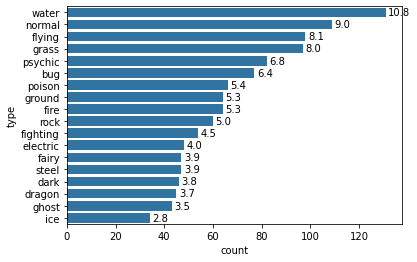

In [67]:
# Printing the text (proportion) on the bars
base_color = sns.color_palette()[0]
sns.countplot(data=pkmn_types, y='type',
              order=type_counts.index, color=base_color)

# logic to print the proportion text on the bars
for i in range(type_counts.shape[0]):
      # type_counts contains the freq of unique values in the `type` 
      # column in decreasing order
      count = type_counts[i]
      
      # convert count into a percentage, and then into string
      pct_string = '{:0.1f}'.format(100*count/n_pokemon)
      
      # print the string value on the bar
      # plt.text(x, y, s, fontdict=None, **kwargs)
      plt.text(count+1, i, pct_string, va='center')

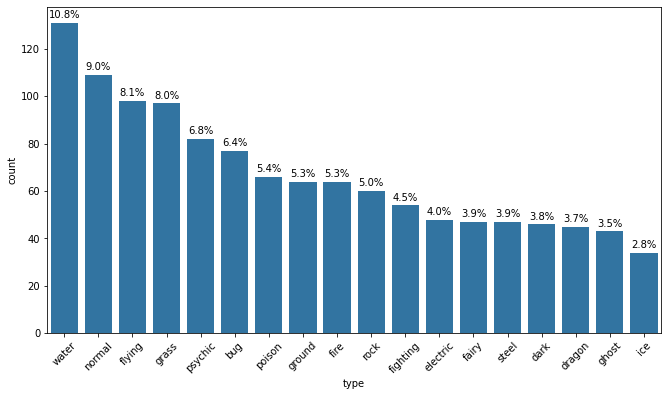

In [84]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sns.color_palette()[0]
plt.figure(figsize=(11,6))
sns.countplot(data=pkmn_types, x='type', color=base_color, order=type_counts.index);


# Recalculating the type_counts just to have clarity.
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')